<a href="https://colab.research.google.com/github/adrianomqs/FIAP_Modulo1_Tech_Challenge/blob/main/FIAP_Modulo1_Tech_Challenge_Unificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorando os dados


*   age: idade do beneficiário principal
*   sex: sexto do beneficiário
*   bmi: IMC do beneficiário
*   children: número de filhos/dependentes
*  smoker: se o beneficário é fumante
*  region: região dos estados unidos onde a pessoa mora



In [10]:
CSV_FILE = "insurance.csv";
import pandas as pd

In [11]:
dados = pd.read_csv(CSV_FILE)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Renomeando as colunas
Renomeando as colunas para Português

In [12]:
colunas = {
    "age": "idade",
    "sex": "sexo",
    "bmi": "imc",
    "children": "filhos",
    "smoker": "fumante",
    "region": "regiao",
    "charges": "custos"
}

dados = dados.rename(columns = colunas)
dados.head()

,idade,sexo,imc,filhos,fumante,regiao,custos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
dados.shape

(1338, 7)

In [14]:
dados.describe()

,idade,imc,filhos,custos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observações:
Idade máxima: 64 anos
Máximo de 5 filhos/dependentes

In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idade    1338 non-null   int64  
 1   sexo     1338 non-null   object 
 2   imc      1338 non-null   float64
 3   filhos   1338 non-null   int64  
 4   fumante  1338 non-null   object 
 5   regiao   1338 non-null   object 
 6   custos   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Verificando a existencia de dados nulos:

In [16]:
dados.isnull().sum()

idade      0
sexo       0
imc        0
filhos     0
fumante    0
regiao     0
custos     0
dtype: int64

Observações:
sem valores nulos

Verificando a existencia de duplicados

In [17]:
dados.duplicated().sum()

1

In [18]:
dados.drop_duplicates(inplace = True)
dados.reset_index(drop = True, inplace = True)
dados.head()

,idade,sexo,imc,filhos,fumante,regiao,custos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Observações:
Verificamos a existencia de dado duplicado, e foi feita a remoção.

## Analisando os dados categóricos

In [19]:
dados.sexo.value_counts()

sexo
male      675
female    662
Name: count, dtype: int64

In [20]:
dados.fumante.value_counts()

fumante
no     1063
yes     274
Name: count, dtype: int64

In [21]:
dados.regiao.value_counts()

regiao
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

### Visualindo os dados utilizando gráficos

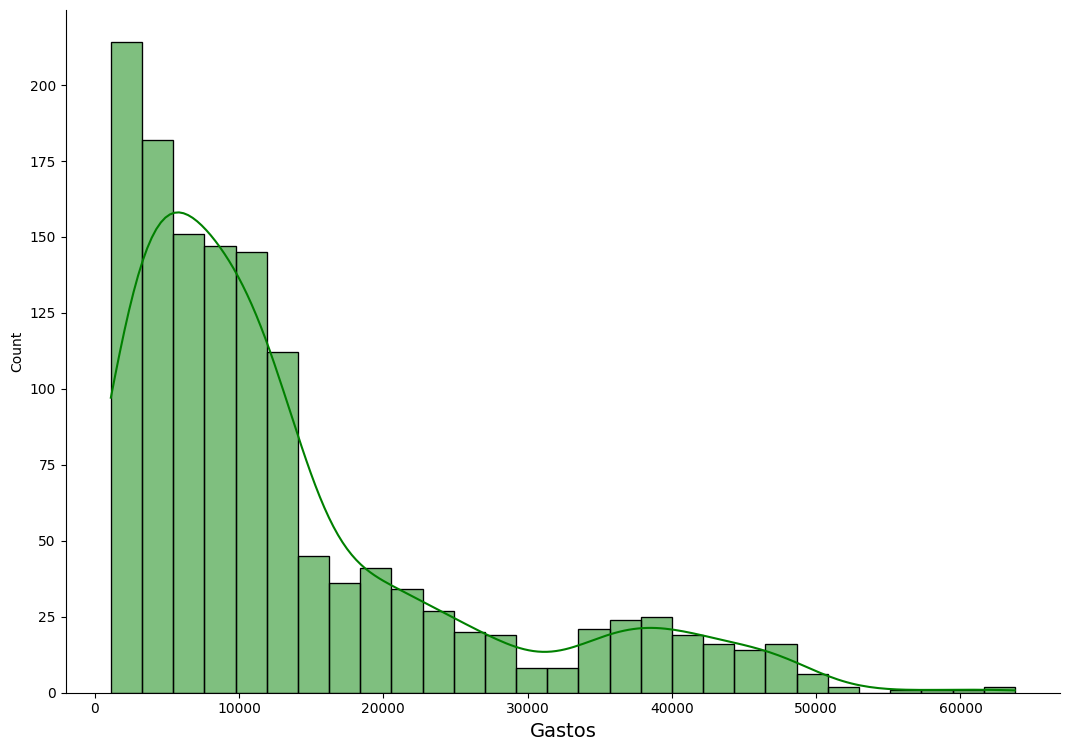

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.displot(dados.custos, kde=True, color='g')
ax.figure.set_size_inches(12,8)
ax.set_titles('Distribuição dos Custos', fontsize=18)
ax.set_xlabels('Gastos', fontsize=14)

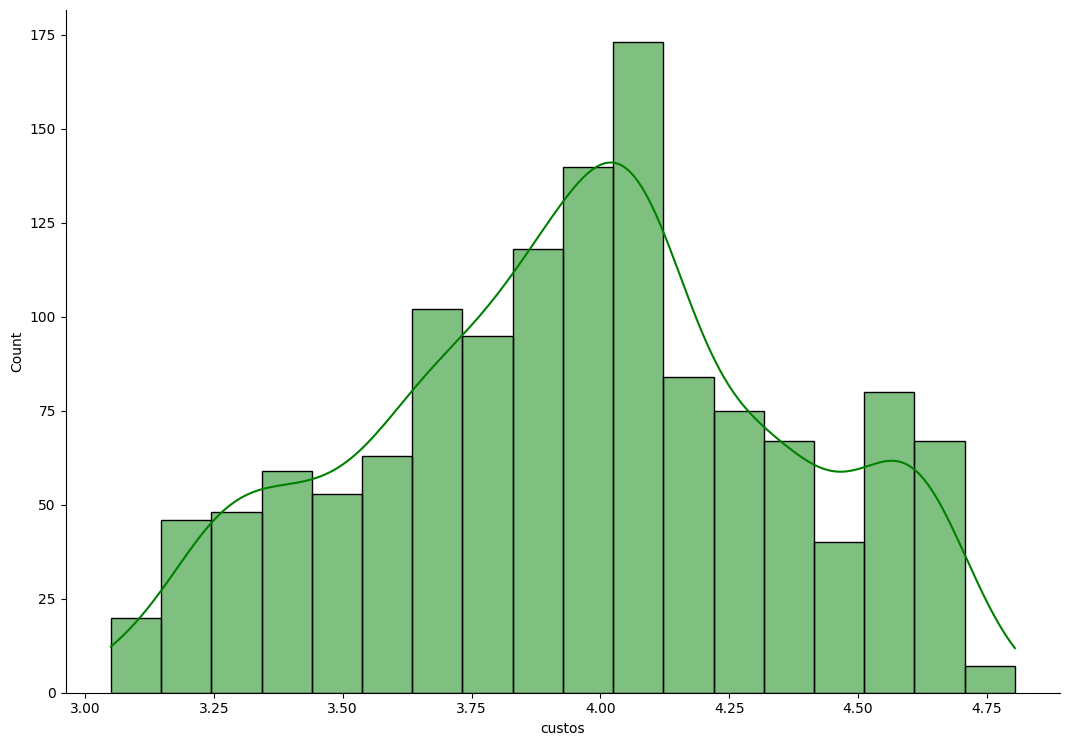

In [23]:
import numpy as np

#f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.displot(np.log10(dados.custos), kde = True, color = 'g' )
ax.figure.set_size_inches(12,8)

In [24]:
custosPorRegiao = dados.custos.groupby(dados.regiao).sum().sort_values(ascending = True)
custosPorRegiao


regiao
southwest    4.012755e+06
northwest    4.034072e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: custos, dtype: float64

<ipython-input-25-1dbebf11469b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(custosPorRegiao, palette='Reds')


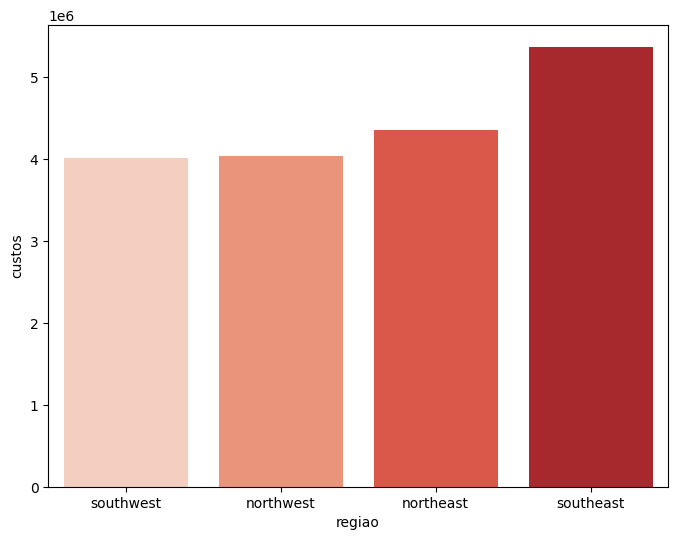

In [25]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(custosPorRegiao, palette='Reds')

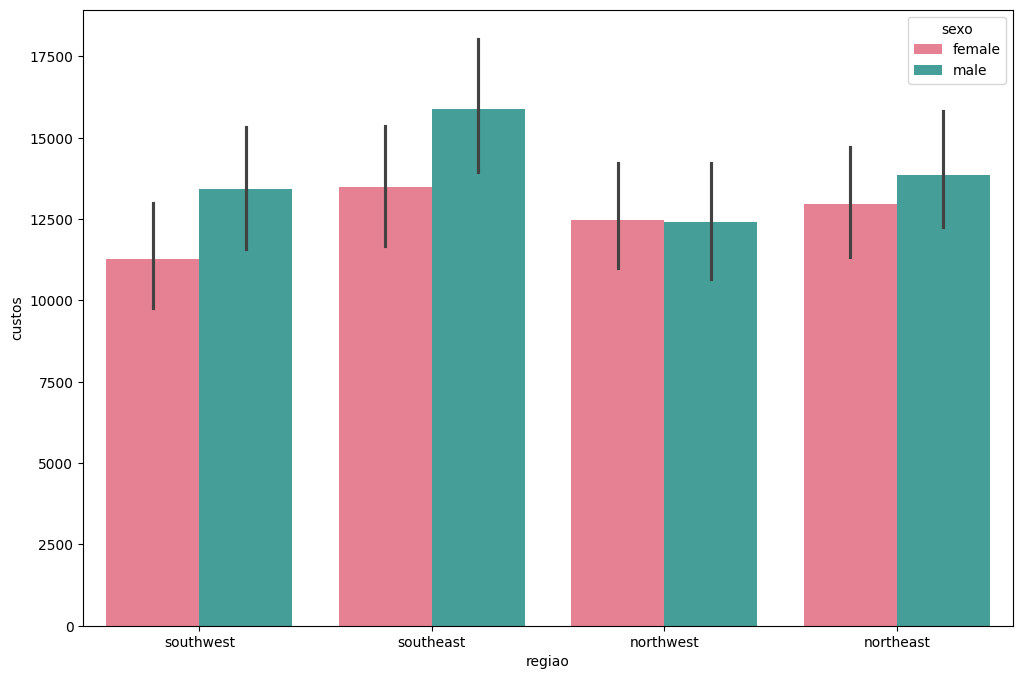

In [26]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='regiao', y='custos', hue='sexo', data=dados, palette='husl')

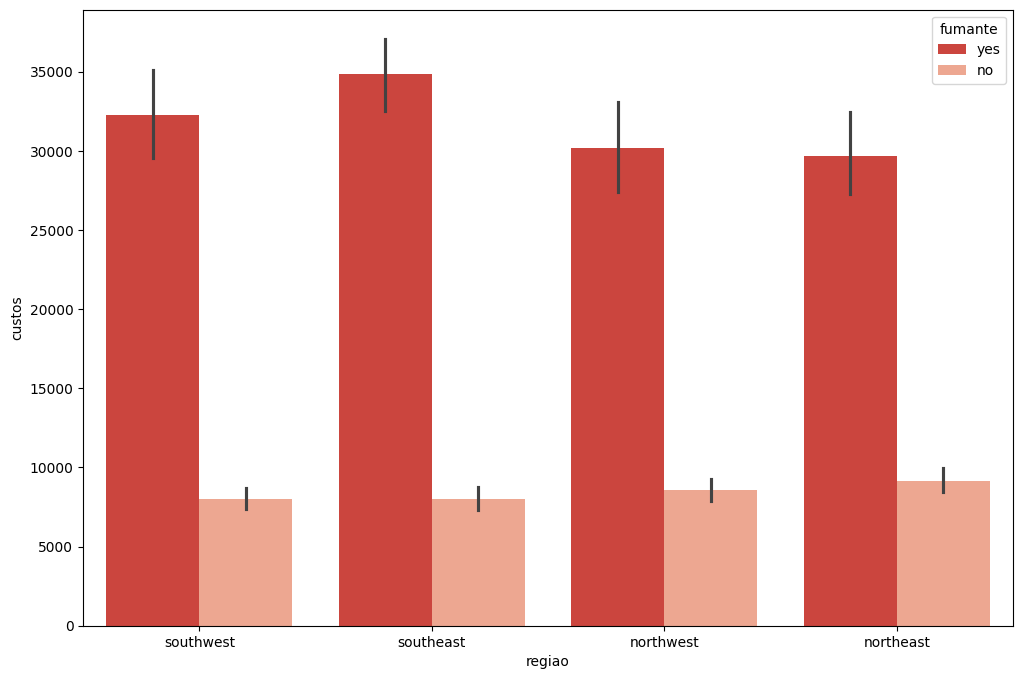

In [27]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'regiao', y = 'custos',
                 hue='fumante', data=dados, palette='Reds_r')

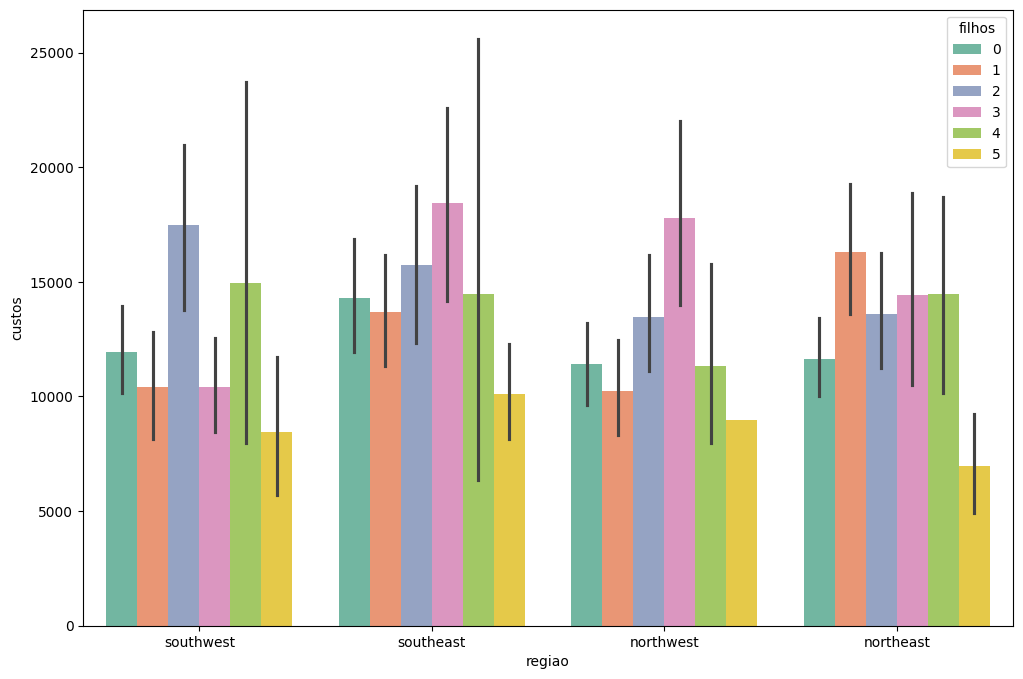

In [28]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='regiao', y='custos', hue='filhos', data=dados, palette='Set2')

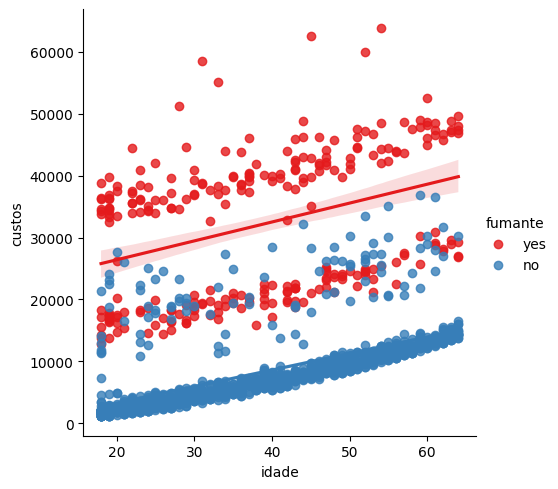

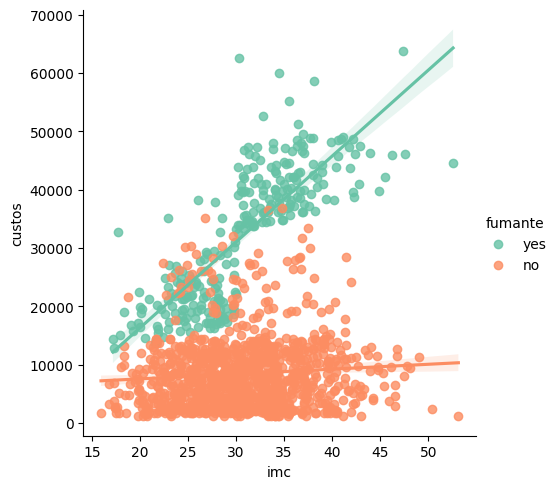

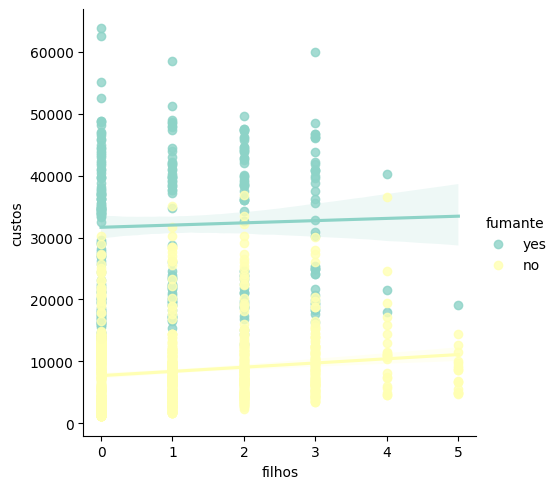

In [29]:
ax = sns.lmplot(x = 'idade', y = 'custos', data=dados, hue='fumante', palette='Set1')
ax = sns.lmplot(x = 'imc', y = 'custos', data=dados, hue='fumante', palette='Set2')
ax = sns.lmplot(x = 'filhos', y = 'custos', data=dados, hue='fumante', palette='Set3')

In [30]:
dados.dtypes

idade        int64
sexo        object
imc        float64
filhos       int64
fumante     object
regiao      object
custos     float64
dtype: object

# Pre-processamento

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [32]:
dados['sexo'] = encoder.fit_transform(dados['sexo'])
dados['fumante'] = encoder.fit_transform(dados['fumante'])
dados['regiao'] = encoder.fit_transform(dados['regiao'])

dados.head()

,idade,sexo,imc,filhos,fumante,regiao,custos
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Matriz de correlação

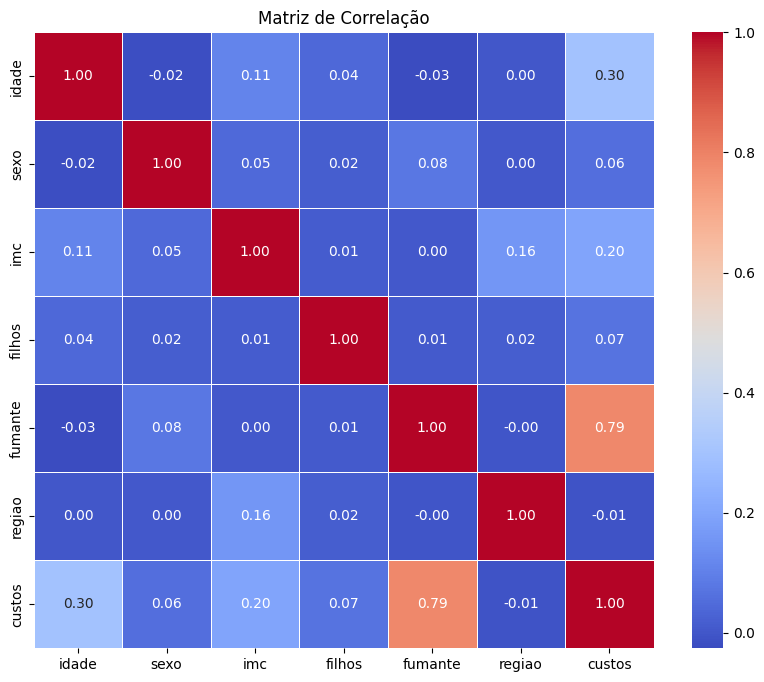

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(dados.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

## Separando os dados de Treinamento e Teste

In [35]:
from sklearn.model_selection import train_test_split
x = dados.drop(['custos'], axis = 1)
y = dados['custos'].astype(int)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Aplicando o MinMaxScaler

In [141]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [68]:
linear_regression = LinearRegression()
linear_regression.fit(x_train_scaled, y_train)

LinearRegression()

In [69]:
print(linear_regression.intercept_) ## (Y)isso representa o efeito médio, excluindo o efeito das outras variáveis, como se elas fossem 0. Custo medio independente das outras variáveis

-1581.238104226666


coef_

Isso mostra o efeito em Y(custos) quando um variável muda apenas uma unidade e outras se mantem constante. Mostram na ordem em que entraram no modelo. No caso idade, sexo, IMC, etd

In [70]:
print(linear_regression.coef_)


[11443.17897767   -99.66461789 11619.72768424  2670.65015851
 23052.13393796  -712.87999698]


Teste de Previsão

In [71]:
y_predito = linear_regression.predict(x_test_scaled)

Metricas

In [72]:
from sklearn.metrics import r2_score, mean_squared_error #métricas de validação

mse = mean_squared_error(y_test, y_predito)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predito)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {(r2 * 100).round(2)}% ")


Mean Squared Error: 35493280.36672753
Root Mean Squared Error: 5957.623718121809
R2 Score: 80.68% 


# Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
random_forest_regressor = RandomForestRegressor(n_estimators = 100, criterion = 'friedman_mse', max_depth = 5,
                              random_state = 1,
                              n_jobs = -1)

Treinamento

In [77]:
random_forest_regressor.fit(x_train_scaled,y_train)



RandomForestRegressor(criterion='friedman_mse', max_depth=5, n_jobs=-1,
                      random_state=1)

Teste de previsão

In [78]:
y_predito = random_forest_regressor.predict(x_test_scaled)

Metricas

In [79]:
from sklearn.metrics import r2_score, mean_squared_error #métricas de validação

mse = mean_squared_error(y_test, y_predito)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predito)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {(r2 * 100).round(2)}% ")

Mean Squared Error: 18165013.692573413
Root Mean Squared Error: 4262.043370564572
R2 Score: 90.11% 


In [80]:
random_forest_regressor.estimators_[0].tree_.max_depth

5

In [81]:
from sklearn import tree
plt.figure(figsize=(100,100))
_ = tree.plot_tree(random_forest_regressor.estimators_[0], feature_names=x.columns, filled=True)

# Gradient Boosting Regressor

In [82]:
from sklearn import ensemble

In [83]:
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=30, min_samples_split=10,
                                                                 min_samples_leaf=6, max_features=0.6, loss='huber')

Treinamento

In [84]:
gradient_boosting_regressor.fit(x_train_scaled, y_train)

GradientBoostingRegressor(loss='huber', max_depth=30, max_features=0.6,
                          min_samples_leaf=6, min_samples_split=10,
                          n_estimators=150)

Teste de Predição

In [150]:
y_predito = gradient_boosting_regressor.predict(x_test_scaled)

Metricas de validação

In [86]:
from sklearn.metrics import r2_score, mean_squared_error #métricas de validação

mse = mean_squared_error(y_test, y_predito)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predito)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {(r2 * 100).round(2)}% ")

Mean Squared Error: 19890626.214649778
Root Mean Squared Error: 4459.890829902653
R2 Score: 89.18% 


# Validação Cruzada

In [160]:
#@title Função para a validação cruzada para modelos de Regressão (Linear, DecisionTree, RandomForest, SVR, ...)

def AplicaValidacaoCruzada(x_axis, y_axis, n_splits):
  # Linear Models.
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.svm import SVR
  from sklearn import ensemble
  from sklearn.ensemble import AdaBoostRegressor

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # Configuração de KFold.
  kfold  = KFold(n_splits=n_splits, shuffle=True)

  # Axis
  x = x_axis
  y = y_axis

  # Criando os modelos

  # Linear Regression
  lr = LinearRegression()
  lr.fit(x, y)

  # Decision Tree
  dt = DecisionTreeRegressor(random_state = 42, max_depth = 5)
  dt.fit(x, y)

  # Random Forest
  rf = RandomForestRegressor(random_state = 42, max_depth = 5, n_estimators = 10)
  rf.fit(x, y)

  # SVR
  svr = SVR()
  svr.fit(x, y)

  #Gradient boosting
  gbr = ensemble.GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=30, min_samples_split=10,
                                                                 min_samples_leaf=6, max_features=0.6, loss='huber')
  gbr.fit(x, y)

  #AdaBoost
  ab = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42)
  ab.fit(x, y)


  # Applyes KFold to models.
  lr_result = cross_val_score(lr, x, y, cv = kfold)
  dt_result = cross_val_score(dt, x, y, cv = kfold)
  rf_result = cross_val_score(rf, x, y, cv = kfold)
  svr_result = cross_val_score(svr, x, y, cv = kfold)
  gbr_result = cross_val_score(gbr, x, y, cv = kfold)
  ab_result = cross_val_score(ab, x, y, cv = kfold)

  # Creates a dictionary to store Linear Models.
  dic_models = {
    "Linear Regression": lr_result.mean(),
    "Decision Tree": dt_result.mean(),
    "Random Forest": rf_result.mean(),
    "SVR": svr_result.mean(),
    "Gradient boosting": gbr_result.mean(),
    "AdaBoost": ab_result.mean()
  }

  # Select the best model.
  melhorModelo = max(dic_models, key=dic_models.get)

  for key in dic_models.keys():
    print(f"{key}: {dic_models[key]}")

  print("-----------------------------------------------------------")
  print("O melhor modelo é : {0} com o valor: {1}".format(melhorModelo, dic_models[melhorModelo]))

Com a Validação Cruzada, é possivel realizar a validação entre mais de um modelo ao mesmo tempo.

In [162]:
AplicaValidacaoCruzada(x, y, 10)

Linear Regression: 0.7395286422260116
Decision Tree: 0.8383507686221376
Random Forest: 0.8498428181887647
SVR: -0.10650688570977243
Gradient boosting: 0.8460376570190948
AdaBoost: 0.7346070168195455
-----------------------------------------------------------
O melhor modelo é : Random Forest com o valor: 0.8498428181887647
